In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aula 7 - Morfologia matemática 

#### Lição de casa 1
A imagem horver.png contém traços horizontais e verticais. Escreva um programa
que lê horver.png e separa os traços horizontais dos verticais usando morfologia matemática,
gerando hor.png e ver.png respectivamente com traços horizontais e verticais somente.

In [55]:
horver = cv2.imread("horver.png")

In [56]:
kernel_hor = np.array([[1, 1, 1, 1, 1]],np.uint8)  # kernel para detectar traços horizontais
kernel_ver = np.array([[1],[1], [1], [1]],np.uint8)  # kernel para detectar traços verticais

In [57]:
# Aplicando abertura na imagem usando os respectivos kernels
horver_hor = cv2.morphologyEx(horver, cv2.MORPH_OPEN, kernel_hor)
horver_ver = cv2.morphologyEx(horver, cv2.MORPH_OPEN, kernel_ver)

Text(0.5, 1.0, 'Imagem com traços verticais')

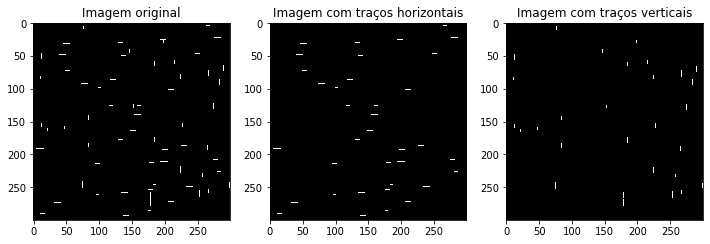

In [58]:
# Exibindo as imagens criadas
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(horver)
ax[0].set_title("Imagem original")

ax[1].imshow(horver_hor)
ax[1].set_title("Imagem com traços horizontais")

ax[2].imshow(horver_ver)
ax[2].set_title("Imagem com traços verticais")

In [59]:
# Salvando as imagens
cv2.imwrite("hor.png", horver_hor)
cv2.imwrite("ver.png", horver_ver)

True

### Lição de casa 2
Adapte o algoritmo 9 para ler a imagem fundoolhog.jpg, e gerar 2 imagens de
saída: sem_mancha_clara.jpg e sem_mancha_escura.jpg. Procure apagar somente as manchas
especificadas.

In [60]:
# https://codereview.stackexchange.com/questions/231225/create-a-structuringselement-in-the-form-of-a-line-with-a-certain-degree-and-len

def bresenham(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = -1 if x0 > x1 else 1
    sy = -1 if y0 > y1 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x1:
            points.append((x, y))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y1:
            points.append((x, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    points.append((x, y))

    return points

def strel_line(length, degrees):
    if length >= 1:
        theta = degrees * np.pi / 180
        x = round((length - 1) / 2 * np.cos(theta))
        y = -round((length - 1) / 2 * np.sin(theta))
        points = bresenham(-x, -y, x, y)
        points_x = [point[0] for point in points]
        points_y = [point[1] for point in points]
        n_rows = int(2 * max([abs(point_y) for point_y in points_y]) + 1)
        n_columns = int(2 * max([abs(point_x) for point_x in points_x]) + 1)
        strel = np.zeros((n_rows, n_columns))
        rows = ([point_y + max([abs(point_y) for point_y in points_y]) for point_y in points_y])
        columns = ([point_x + max([abs(point_x) for point_x in points_x]) for point_x in points_x])
        idx = []
        for x in zip(rows, columns):
            idx.append(np.ravel_multi_index((int(x[0]), int(x[1])), (n_rows, n_columns)))
        strel.reshape(-1)[idx] = 1

    return strel

In [196]:
def max_arrays(a, b):
    c = np.empty(a.shape)
    (num_col, num_l) = a.shape[:2]
    for i in range(num_col):
        for j in range(num_l):
            c[i, j] = max(a[i, j], b[i, j])
    return c

In [205]:
def min_arrays(a, b):
    c = np.empty(a.shape)
    (num_col, num_l) = a.shape[:2]
    for i in range(num_col):
        for j in range(num_l):
            c[i, j] = min(a[i, j], b[i, j])
    return c

In [250]:
fundo_olho = cv2.imread("fundoolhog.jpg", 0)
fundo_olho_neg = cv2.bitwise_not(fundo_olho)

In [251]:
c = np.empty(fundo_olho.shape)

for deg in range(1, 181, 10):
    e = strel_line(50, deg).astype(np.uint8)
    b = cv2.morphologyEx(fundo_olho, cv2.MORPH_OPEN, e)
    c = max_arrays(b, c)

In [252]:
e33 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))*255

In [253]:
for i in range(100):
    c = min_arrays(cv2.dilate(c, e33), fundo_olho)

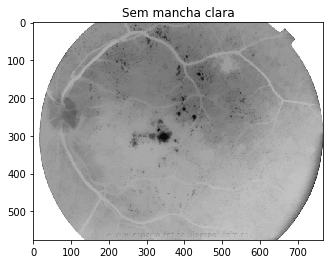

In [254]:
plt.imshow(c, cmap="gray")
plt.title("Sem mancha clara")
plt.show()

In [ ]:
c = np.empty(fundo_olho.shape)

for deg in range(1, 181, 10):
    e = strel_line(50, deg).astype(np.uint8)
    b = cv2.morphologyEx(fundo_olho_neg, cv2.MORPH_OPEN, e)
    c = max_arrays(b, c)
    
for i in range(100):
    c = min_arrays(cv2.dilate(c, e33), fundo_olho_neg)
    
fundo_olho_2 = cv2.bitwise_not(fundo_olho_neg)

In [ ]:
plt.imshow(c, cmap="gray")
plt.title("Sem mancha clara")
plt.show()

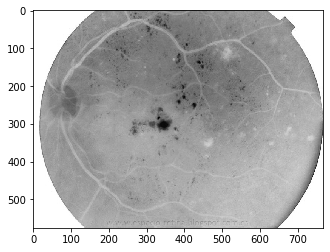

In [247]:
plt.imshow(fundo_olho_2, cmap="gray")

In [8]:
# //aneurisma.cpp pos2016
# #include <cekeikon.h>
# int main()
# { using namespace Morphology;
#  Mat_<GRY> a; le(a,"an-ori.pgm");
#  Mat_<GRY> c(a.size(),0);
#  for (double deg=0; deg<180.0; deg=deg+180.0/18.0) {
#  Mat_<GRY> e=strel(25,deg);
#  Mat_<GRY> b=a-e+e;
#  c = c || b;
#  }
#  imp(c,"an-c.pgm");
#  Mat_<GRY> t; Mat_<GRY> e33(3,3,255);
#  do {
#  t=c.clone(); // t=c errado
#  c=(c+e33) && a;
#  } while (t!=c);
#  imp(c,"an-rec.pgm");
#  { using cv::operator-;
#  Mat_<GRY> an = a - c;
#  imp(an,"an-an.pgm");
#  }

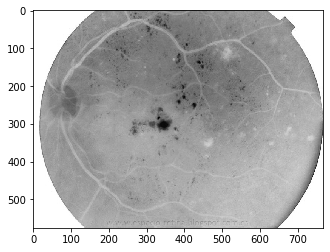

In [27]:
plt.imshow(fundo_olho, cmap="gray")

In [28]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

In [29]:
teste = cv2.morphologyEx(fundo_olho, cv2.MORPH_CLOSE, kernel)

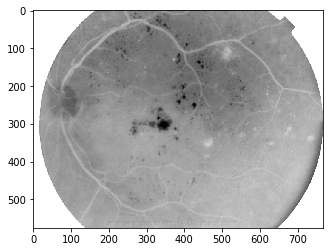

In [30]:
plt.imshow(teste, cmap="gray")

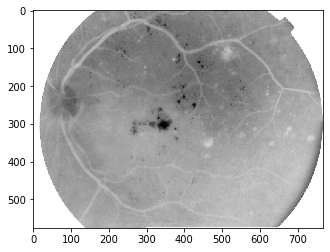

In [31]:
teste = cv2.dilate(fundo_olho, kernel)
plt.imshow(teste, cmap="gray")

In [32]:
kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)